In [16]:
pip install ndlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import pandas as pd
import networkx as nx
from sklearn.cluster import KMeans
import numpy as np 
from math import *

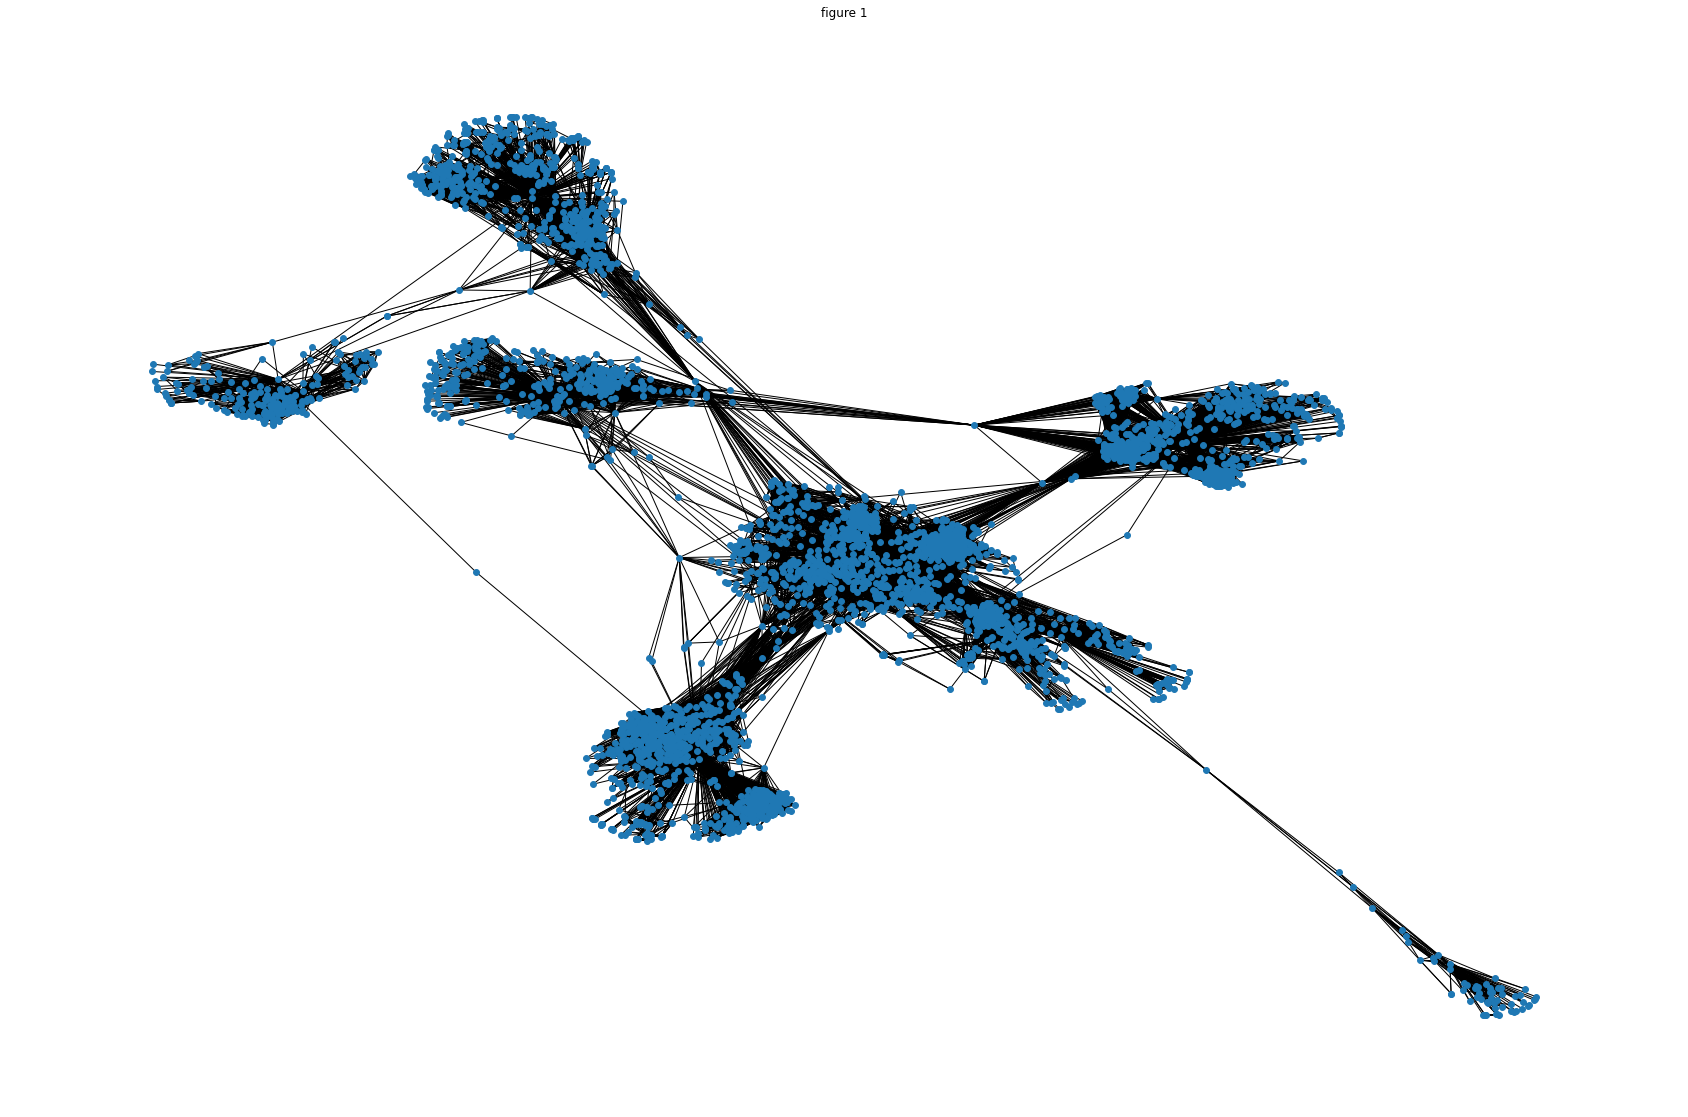

In [18]:
plt.figure(figsize=(30,20))
G=nx.read_edgelist('facebook_combined.txt',create_using=nx.Graph(),nodetype=int)
sp=nx.spring_layout(G)

nx.draw_networkx(G,pos=sp,with_labels=False,node_size=35)
plt.title('figure 1')

plt.axis('off')

plt.show()

In [22]:
def TOPSIS(G1):
    betCent = nx.betweenness_centrality(G1)
    closCent = nx.closeness_centrality(G1)
    degCent = nx.degree_centrality(G1)
    eigCent = nx.eigenvector_centrality(G1)


    BC = []
    DC = []
    EC = []
    CC = []

    for i in sorted(betCent):
        BC.append(betCent[i])

    for i in sorted(closCent):
        CC.append(closCent[i])

    for i in sorted(degCent):
        DC.append(degCent[i])

    for i in sorted(eigCent):
        EC.append(eigCent[i])

   
    mat = pd.DataFrame({'DC' : DC,
                        'CC' : CC,
                        'BC' : BC,
                        'EC' : EC})


    DC_denom = sqrt((mat['DC']**2).sum())
    CC_denom = sqrt((mat['CC']**2).sum())
    BC_denom = sqrt((mat['BC']**2).sum())
    EC_denom = sqrt((mat['EC']**2).sum())



    mat_norm = pd.DataFrame({
        'DC' : mat['DC'] / DC_denom,
        'CC' : mat['CC'] / CC_denom,
        'BC' : mat['BC'] / BC_denom,
        'EC' : mat['EC'] / EC_denom,
    })

   

    mat_norm_weighted = mat_norm

    mat_norm_weighted['DC'] = mat_norm_weighted['DC'] * 0.2
    mat_norm_weighted['EC'] = mat_norm_weighted['EC'] * 0.2
    mat_norm_weighted['BC'] = mat_norm_weighted['BC'] * 0.3
    mat_norm_weighted['CC'] = mat_norm_weighted['CC'] * 0.3

   

    DC_ideal_best = mat_norm_weighted['DC'].max()
    DC_ideal_worst = mat_norm_weighted['DC'].min()

    CC_ideal_best = mat_norm_weighted['CC'].max()
    CC_ideal_worst = mat_norm_weighted['CC'].min()

    BC_ideal_best = mat_norm_weighted['BC'].max()
    BC_ideal_worst = mat_norm_weighted['BC'].min()

    EC_ideal_best = mat_norm_weighted['EC'].max()
    EC_ideal_worst = mat_norm_weighted['EC'].min()

  

    mat_norm_weighted["from_best"] = (mat_norm_weighted["DC"] - DC_ideal_best)**2 + (mat_norm_weighted['CC'] - CC_ideal_best)**2 + (mat_norm_weighted['BC'] - BC_ideal_best)**2 + (mat_norm_weighted['EC'] - EC_ideal_best)**2
    mat_norm_weighted["from_worst"] = (mat_norm_weighted["DC"] - DC_ideal_worst)**2 + (mat_norm_weighted['CC'] - CC_ideal_worst)**2 + (mat_norm_weighted['BC'] - BC_ideal_worst)**2 + (mat_norm_weighted['EC'] - EC_ideal_worst)**2

    

    mat_norm_weighted["from_best"] = mat_norm_weighted["from_best"].apply(lambda x : sqrt(x))
    mat_norm_weighted["from_worst"] = mat_norm_weighted["from_worst"].apply(lambda x : sqrt(x))

    

    mat_norm_weighted['ratio'] = mat_norm_weighted['from_worst'] / (mat_norm_weighted['from_worst'] + mat_norm_weighted['from_best'])

   

    result = mat

    result['TOPSIS'] = mat_norm_weighted['ratio']
    result.sort_values(by="TOPSIS", ascending=False ,inplace=True)

    result.reset_index(inplace=True)

    result.rename(columns={"index" : "node"}, inplace=True)

    #

    return result

In [23]:
data=TOPSIS(G)
data.to_csv("TOPSIS_result.csv", index = False)

In [24]:
data

,node,DC,CC,BC,EC,TOPSIS
0,107,0.258791,0.459699,0.480518,2.606940e-04,0.913277
1,1684,0.196137,0.393606,0.337797,7.164260e-06,0.695566
2,1912,0.186974,0.350947,0.229295,9.540696e-02,0.496063
3,3437,0.135463,0.314413,0.236115,9.531613e-08,0.488865
4,0,0.085934,0.353343,0.146306,3.391796e-05,0.304321
...,...,...,...,...,...,...
4034,775,0.000495,0.178262,0.000000,6.433195e-14,0.000229
4035,749,0.000495,0.178262,0.000000,6.433195e-14,0.000229
4036,841,0.000495,0.178262,0.000000,6.446055e-14,0.000229
4037,692,0.000248,0.178255,0.000000,6.385265e-14,0.000000
